# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/media/c/HD/Caio/Cursos/Udemy/Machine Learning/Machine+Learning+A-Z+(Codes+and+Datasets)/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.iloc[:]['State'].nunique() #how many diferent categories
pd.unique(dataset.iloc[:]['State']) #which are those categories

array(['New York', 'California', 'Florida'], dtype=object)

In [4]:
dataset.groupby(['State']).size() # Counting occurences

State
California    17
Florida       16
New York      17
dtype: int64

In [5]:
dataset.groupby(['Marketing Spend']).size()[0] # Counting 0s (nulls)

3

## Encoding categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder                  # index of column to encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X[0:10])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]]


Feature Scalling is not necessary in MLR because the variables will be
transformed by its coefficients

In [9]:
# Getting the binary encode for each category (using pandas' concat method)
Categories = pd.concat([dataset['State'], pd.DataFrame(X[:, 0:3])], axis=1)
print(Categories.head())

        State    0    1    2
0    New York  0.0  0.0  1.0
1  California  1.0  0.0  0.0
2     Florida  0.0  1.0  0.0
3    New York  0.0  0.0  1.0
4     Florida  0.0  1.0  0.0


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Don't worry about dummy variable trap neither about select the best model. ScikitLearn do both for you!

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))
                              # put dependent variable in vertical

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


[  -267.18 -11677.12 -13674.21  -5822.73 -12512.91  11152.93 -13377.37
   1308.17   3617.19   1733.13]
3952.010244815363
8239.203787841454


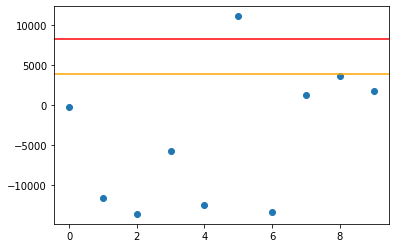

In [88]:
# Setting the acuracy of the predictions
dif_abs = y_pred - y_test
dif_rel = dif_abs/y_test
mad = np.abs(np.mean(dif_abs)) # Mean Absolute Deviation
std = np.std(dif_abs) # Standard Deviation
print(dif_abs)
print(mad)
print(std)

# Plotting them
            # generate a array with n elements
plt.scatter(np.arange(10), dif_abs)
plt.axhline(mad, color = 'orange') # plotting horizontal line
plt.axhline(std, color = 'red')
plt.show()

MAD <= STD for all distributions due to Jensen’s Inequality !

In [13]:
# Getting the final linear regression
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248579056


In [14]:
# Making a single prediction (for example the profit of a startup with R&D Spend = 160000, 
# Administration Spend = 130000,  Marketing Spend = 300000 and State = 'California')
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]])) # The "State" is given as Binary Encoded
                        # duple indexing "[[]]" is used because numpy are considering a 2D array

[181566.92]
